In [105]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns #https://xkcd.com/color/rgb/
from matplotlib.ticker import FormatStrFormatter
from matplotlib import gridspec
from scipy.optimize import curve_fit
%matplotlib inline

In [106]:
def line(x,a,b):
    return a*x + b

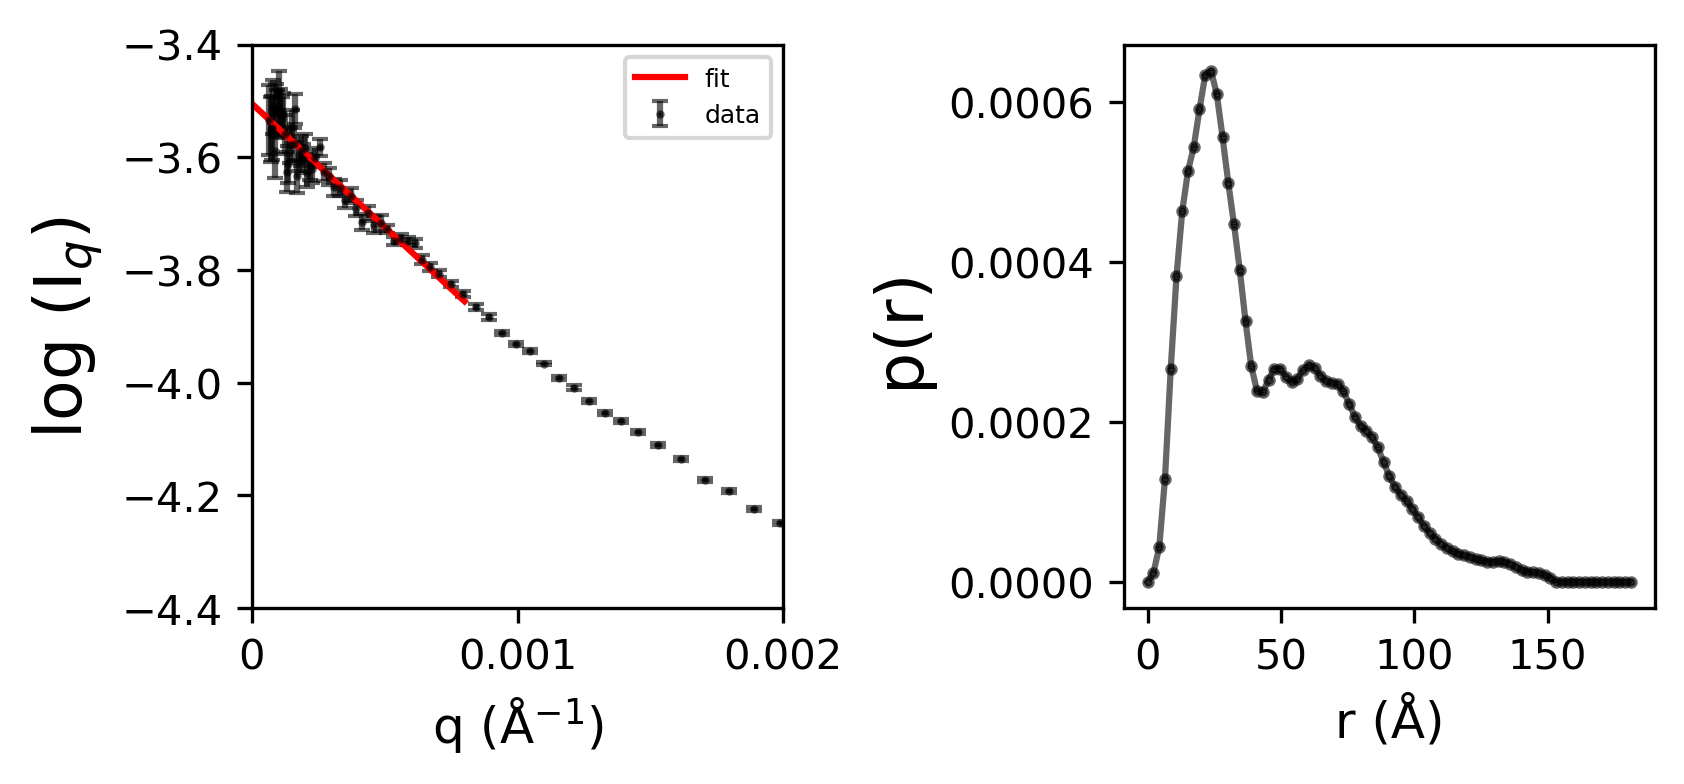

In [107]:


file_list = ['data_WT_saxs_1.10.dat', 'BayesApp_full-lengthWT/pr.d']

c1 = sns.xkcd_rgb["black"]
c2 = sns.xkcd_rgb["red"]
c3 = sns.xkcd_rgb["sky blue"]
c4 = sns.xkcd_rgb["green"]
c5 = sns.xkcd_rgb["orange"]
c6 = sns.xkcd_rgb["blue"]
c7 = sns.xkcd_rgb["denim blue"]
color_list = [c1,c2,c3,c4,c5,c6]

fig, ax = plt.subplots(nrows=1, ncols=2, dpi=300,figsize=(5.5,2.5), gridspec_kw=dict(hspace=0.2),constrained_layout=True)


#plot saxs fitting
data = np.loadtxt(file_list[0])
x = data[:,0]
avg_exp = np.log(data[:,1])
sigma_exp = data[:,2]/data[:,1]

idx = np.where(x**2 < 0.0008)[-1][-1]

popt, pcov = curve_fit(line, (x**2)[:idx], avg_exp[:idx])
guinierx = np.linspace(0,0.0008, num=10)

ax[0].errorbar(x**2, avg_exp,yerr=sigma_exp,fmt='.', markersize=2, capsize=2, color=c1,alpha=0.6,label='data')
ax[0].plot(guinierx, line(guinierx, *popt), color='r', label='fit')
#ax[0].set_yscale('log')
ax[0].set_xlim(0,0.002)
ax[0].set_ylim(-4.4,-3.4)
ax[0].set_ylabel(r'log (I$_{q}$)', fontsize=16)
ax[0].set_xlabel(r'q (Å$^{-1}$)', fontsize=12)
ax[0].set_xticks([0,0.001, 0.002])
ax[0].set_xticklabels([0,0.001, 0.002])
ax[0].legend(fontsize=6)
data = np.loadtxt(file_list[1])
x = data[:,0]
pR = data[:,1]
pR_sigma = data[:,2]

ax[1].errorbar(x, pR,yerr=pR_sigma,fmt='.-', markersize=4, capsize=0, color=c1,alpha=0.6,label='Experimental data')
ax[1].set_ylabel('p(r)', fontsize=16)
ax[1].set_xlabel('r (Å)', fontsize=12)
#plt.savefig('pR-guinier.png')
plt.show()
